<a href="https://colab.research.google.com/github/MateuszPasternak/PythonForML_AGH/blob/main/DataPrepForRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [275]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [276]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/Python_for_ML/stackoverflow_full.csv')

In [277]:
data.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [278]:
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
from sklearn.preprocessing import (
  MinMaxScaler,
  StandardScaler,
)

Categorical Values

In [279]:
df_numerical = data.select_dtypes("number")
df_categorical = data.select_dtypes("object")

In [280]:
df_categorical["Age"] = df_categorical["Age"].replace({"<35": 1, ">35": 0})
df_numerical["Age"] = df_categorical[["Age"]]

In [281]:
df_categorical["MentalHealth"] = df_categorical["MentalHealth"].replace({"No": 0, "Yes": 1})
df_numerical["MentalHealth"] = df_categorical[["MentalHealth"]]

In [282]:
df3 = df_categorical.copy()

df_num = pd.get_dummies(df3,
                     columns = ['EdLevel'])
df_num = pd.get_dummies(df_num,
                     columns = ['Gender'])
df_num = pd.get_dummies(df_num,
                     columns = ['Accessibility'])

#display(df3)
df_num.head()

,Age,MentalHealth,MainBranch,Country,HaveWorkedWith,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,Accessibility_No,Accessibility_Yes
0,1,0,Dev,Sweden,C++;Python;Git;PostgreSQL,1,0,0,0,0,1,0,0,1,0
1,1,0,Dev,Spain,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,0,0,0,0,1,1,0,0,1,0
2,1,0,Dev,Germany,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,1,0,0,0,0,1,0,0,1,0
3,1,0,Dev,Canada,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,0,0,0,0,1,1,0,0,1,0
4,0,0,NotDev,Singapore,C++;Python,0,0,0,1,0,1,0,0,1,0


In [283]:
df_num.drop(['MainBranch', 'Country', 'HaveWorkedWith'], axis=1)

,Age,MentalHealth,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,Accessibility_No,Accessibility_Yes
0,1,0,1,0,0,0,0,1,0,0,1,0
1,1,0,0,0,0,0,1,1,0,0,1,0
2,1,0,1,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,1,1,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,0,0,0,0,1,1,0,0,1,0
73458,0,0,0,0,0,0,1,1,0,0,1,0
73459,1,0,0,0,0,0,1,1,0,0,1,0
73460,1,1,0,0,0,0,1,1,0,0,0,1


In [284]:
for i in df_num:
  df_numerical[i] = df_num[i]

In [285]:
data = df_numerical
data.head()

,Unnamed: 0,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,Age,MentalHealth,MainBranch,...,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,Accessibility_No,Accessibility_Yes
0,0,1,7,4,51552.0,4,0,1,0,Dev,...,1,0,0,0,0,1,0,0,1,0
1,1,1,12,5,46482.0,12,1,1,0,Dev,...,0,0,0,0,1,1,0,0,1,0
2,2,1,15,6,77290.0,7,0,1,0,Dev,...,1,0,0,0,0,1,0,0,1,0
3,3,1,9,6,46135.0,13,0,1,0,Dev,...,0,0,0,0,1,1,0,0,1,0
4,4,0,40,30,160932.0,2,0,0,0,NotDev,...,0,0,0,1,0,1,0,0,1,0


Data split (testing, training)

In [286]:
data = data.dropna()

In [287]:
data = data.drop_duplicates()

In [288]:
'''
from sklearn.model_selection import train_test_split

#Unnamed: 0 	Age 	Accessibility 	EdLevel 	Employment 	Gender 	MentalHealth 	MainBranch 	YearsCode
#YearsCodePro 	Country 	PreviousSalary 	HaveWorkedWith 	ComputerSkills 	Employed

X = data.drop(['Unnamed: 0', 'Employment', 'Country', 'HaveWorkedWith',
               'MainBranch', 'MentalHealth','ComputerSkills', 'Employed'], axis = 1)
y = data['MentalHealth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.75, random_state=1)

X_train.head()
'''

"\nfrom sklearn.model_selection import train_test_split\n\n#Unnamed: 0 \tAge \tAccessibility \tEdLevel \tEmployment \tGender \tMentalHealth \tMainBranch \tYearsCode\n#YearsCodePro \tCountry \tPreviousSalary \tHaveWorkedWith \tComputerSkills \tEmployed\n\nX = data.drop(['Unnamed: 0', 'Employment', 'Country', 'HaveWorkedWith',\n               'MainBranch', 'MentalHealth','ComputerSkills', 'Employed'], axis = 1)\ny = data['MentalHealth']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)\nX_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.75, random_state=1)\n\nX_train.head()\n"

V2

In [289]:
from sklearn.model_selection import train_test_split

#Unnamed: 0 	Age 	Accessibility 	EdLevel 	Employment 	Gender 	MentalHealth 	MainBranch 	YearsCode
#YearsCodePro 	Country 	PreviousSalary 	HaveWorkedWith 	ComputerSkills 	Employed

data = data.drop(['Unnamed: 0', 'Employment', 'Country', 'HaveWorkedWith',
               'MainBranch','ComputerSkills', 'Employed'], axis = 1)
#y = data['MentalHealth']

Data_train, Data_test = train_test_split(data, test_size=0.2)
Data_train, Data_val = train_test_split(Data_train, test_size=0.25)
dataX = Data_train
#dataX = Data_train[Data_train['YearsCodePro'] <= Data_train['YearsCode']]

<Axes: xlabel='MentalHealth', ylabel='YearsCodePro'>

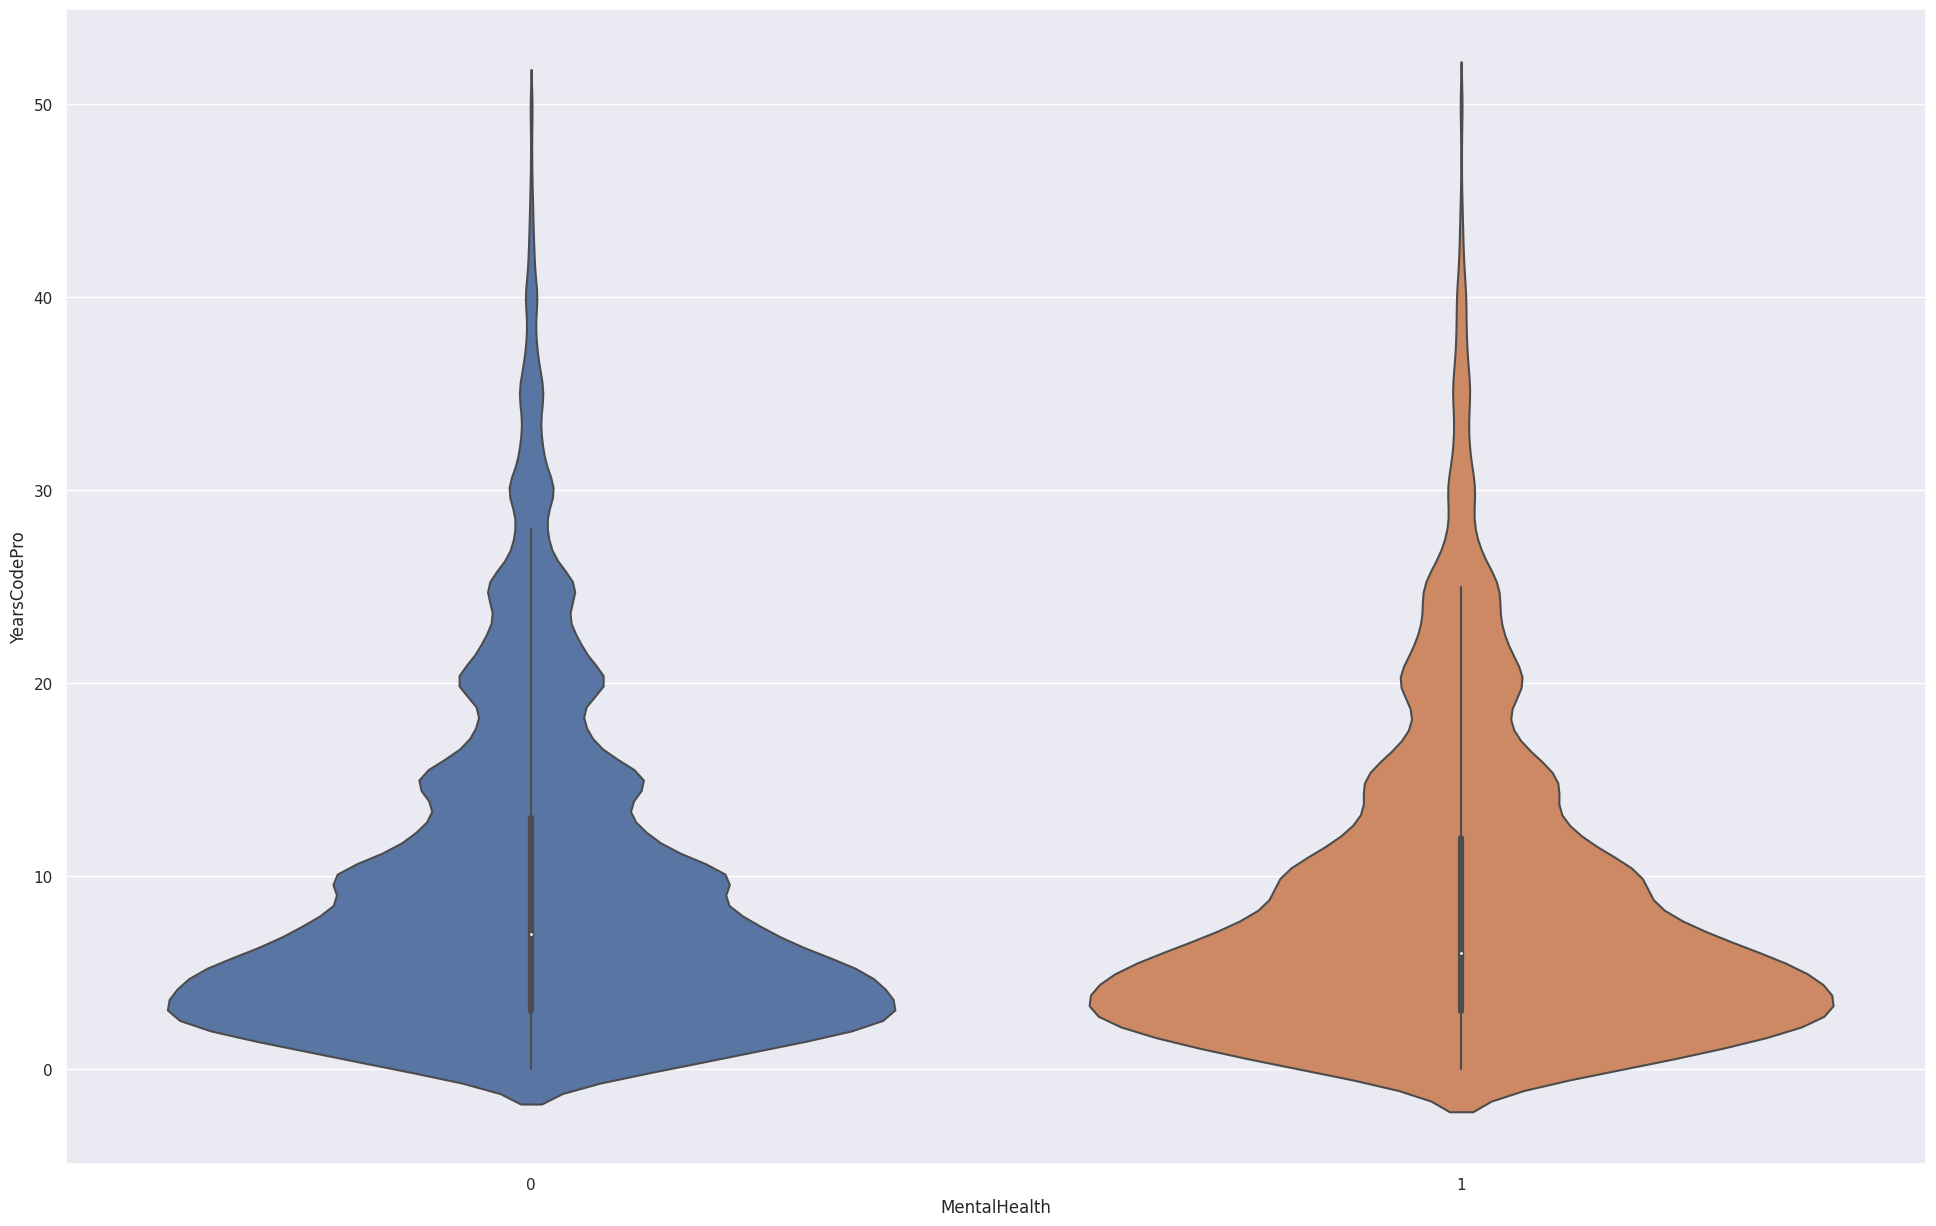

In [290]:
sns.set_theme()

plt.figure(figsize=(24, 15))
sns.violinplot(data, x = 'MentalHealth', y = 'YearsCodePro')

Data operation on train set

<Axes: >

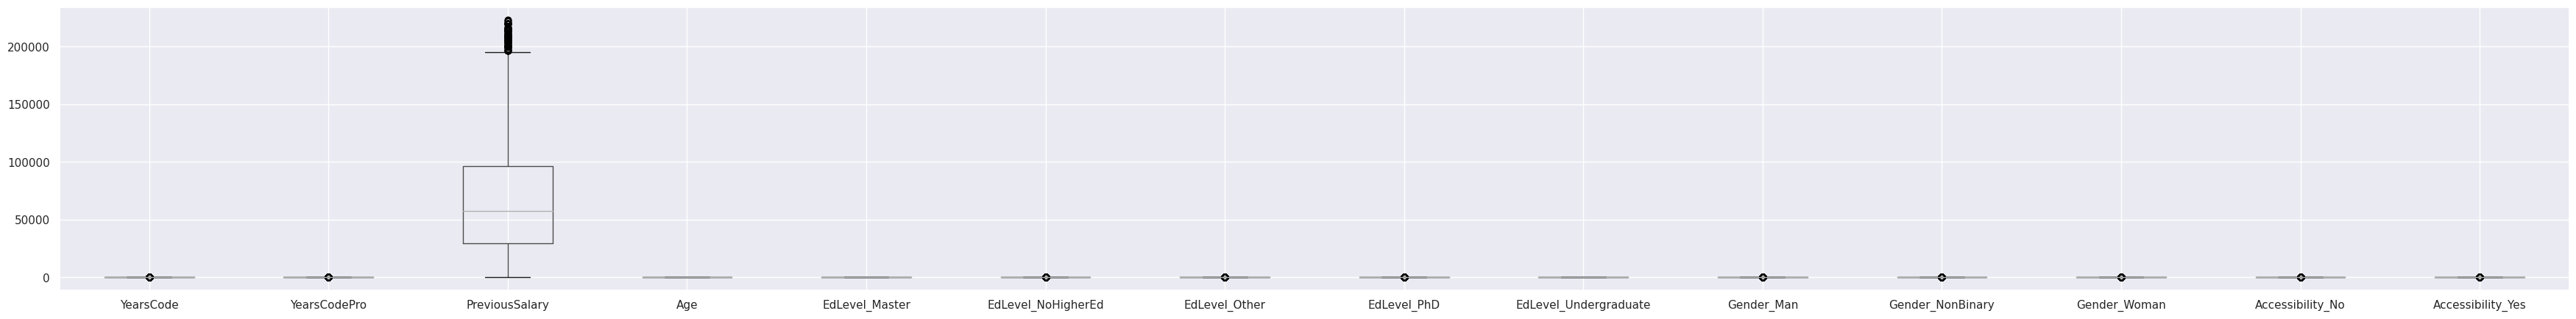

In [291]:
plt.figure(figsize=(44, 5))
X_train.boxplot()

Normalizing data

In [292]:
X = dataX.drop(['MentalHealth'], axis = 1)
y = dataX['MentalHealth']

X_test = Data_test.drop(['MentalHealth'], axis = 1)
y_test = Data_test['MentalHealth']

X_val = Data_val.drop(['MentalHealth'], axis = 1)
y_val = Data_val['MentalHealth']

In [293]:
X_train_old = X

In [294]:
minmax_scaler = MinMaxScaler().set_output(transform="pandas")
dataTrain_normalized = minmax_scaler.fit_transform(X)
dataTrain_normalized_old = minmax_scaler.fit_transform(X_train_old)

<Axes: >

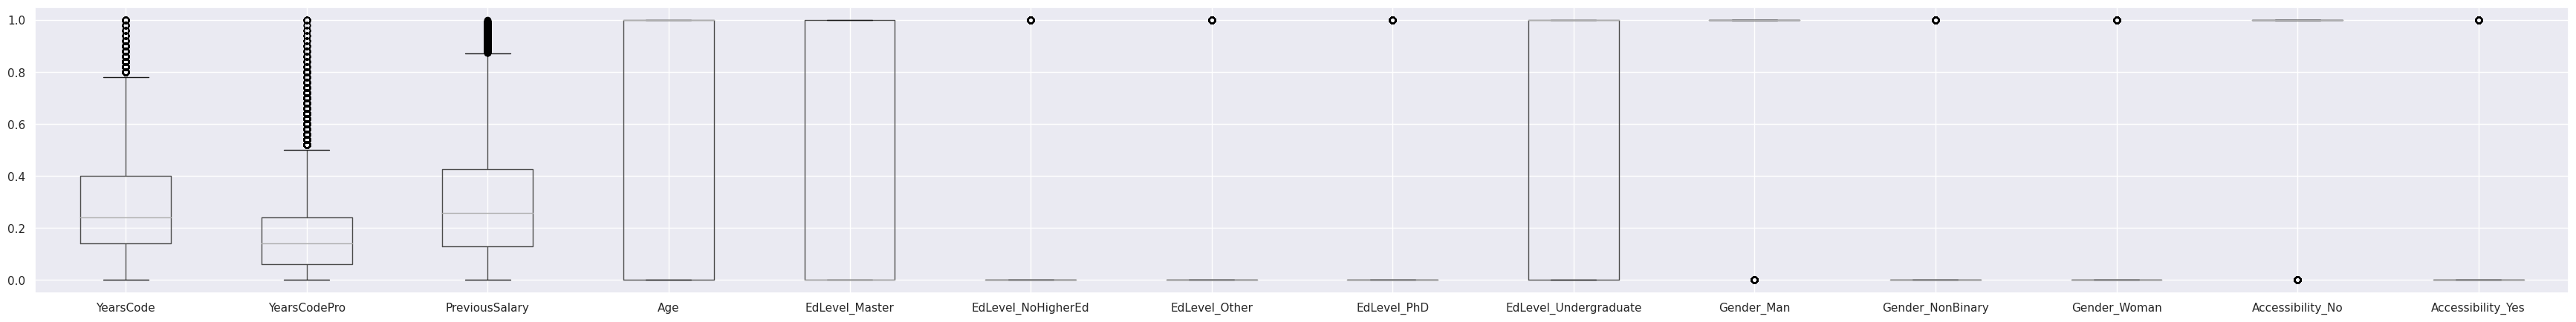

In [295]:
plt.figure(figsize=(44, 5))
dataTrain_normalized.boxplot()

<Axes: xlabel='YearsCode', ylabel='YearsCodePro'>

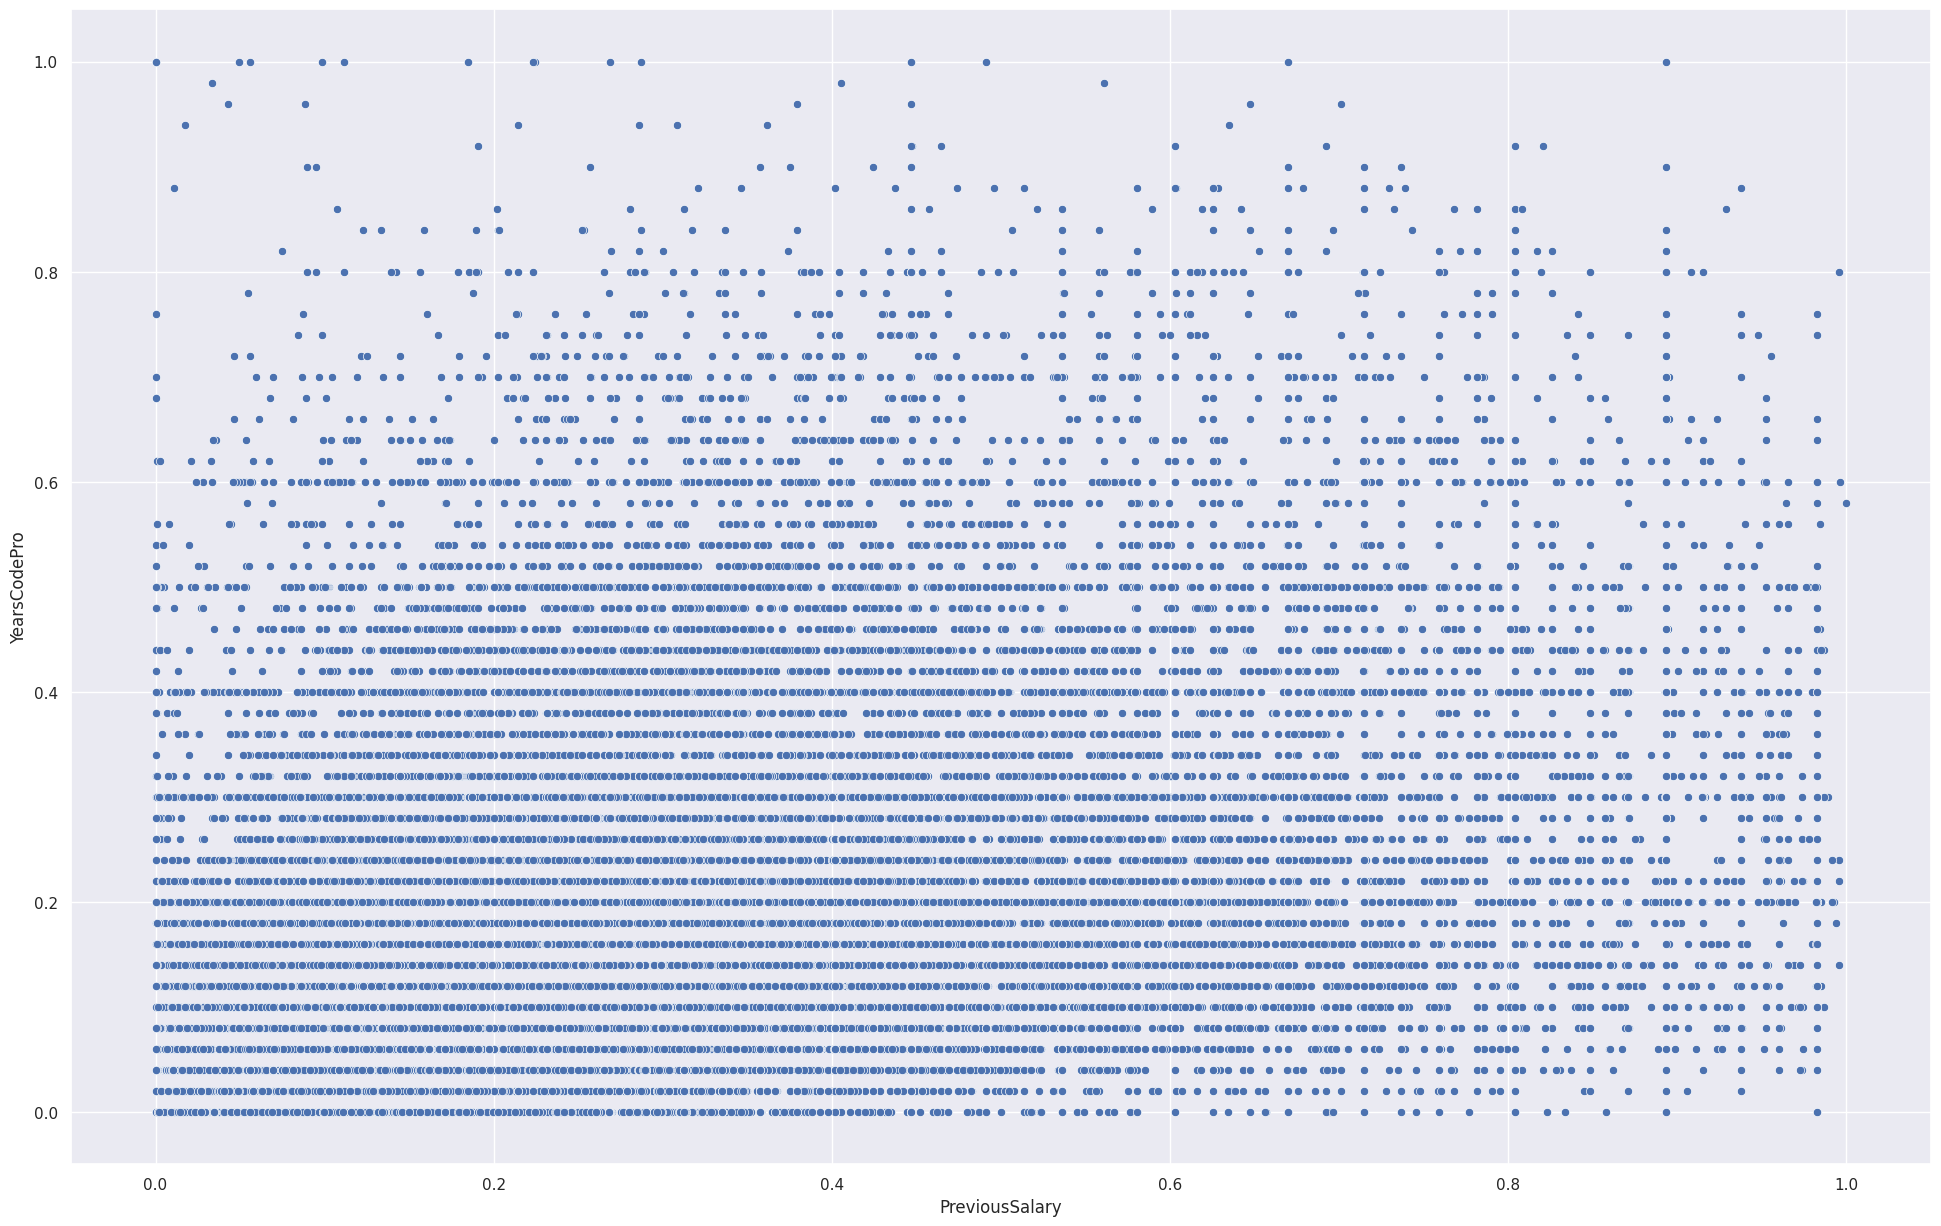

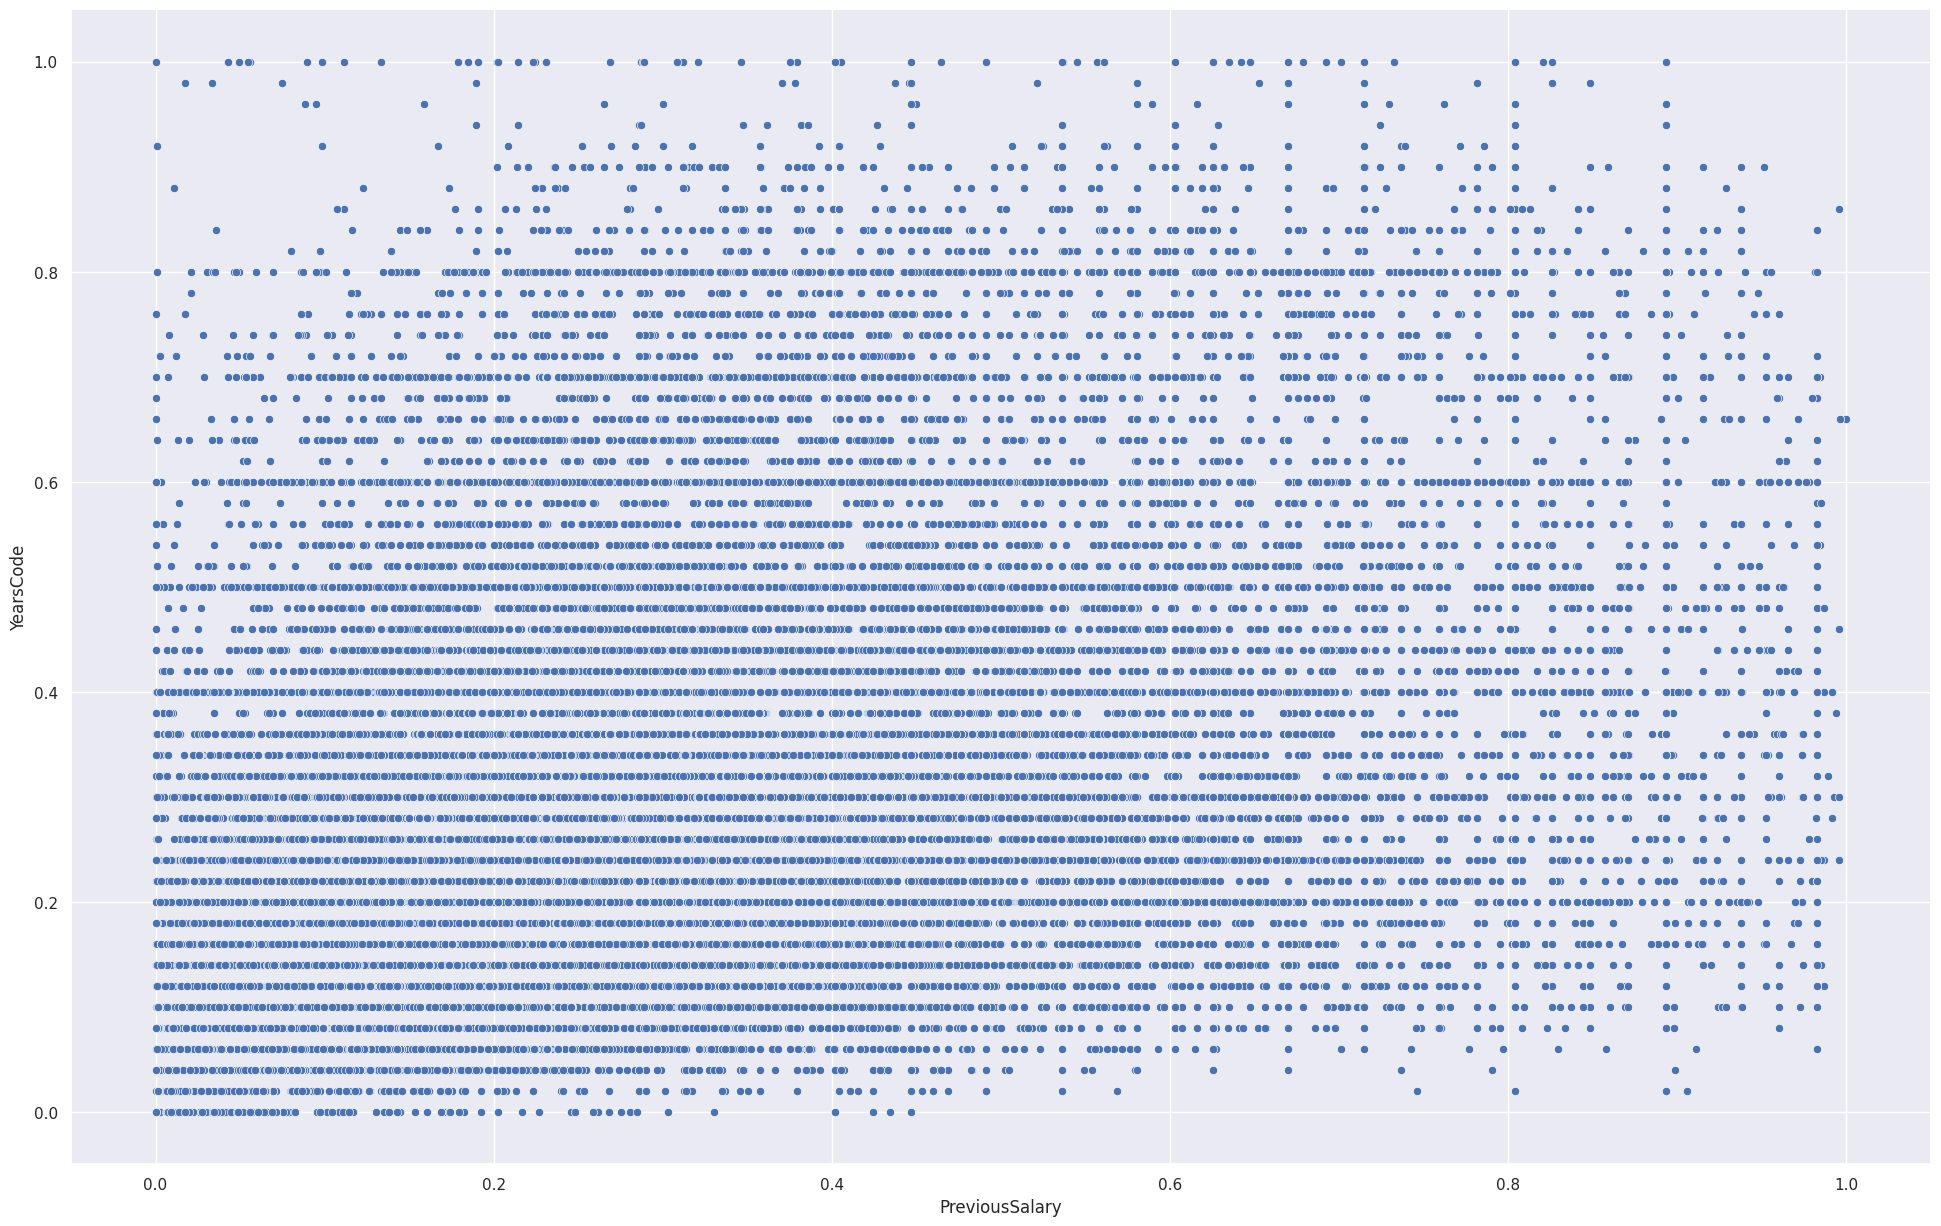

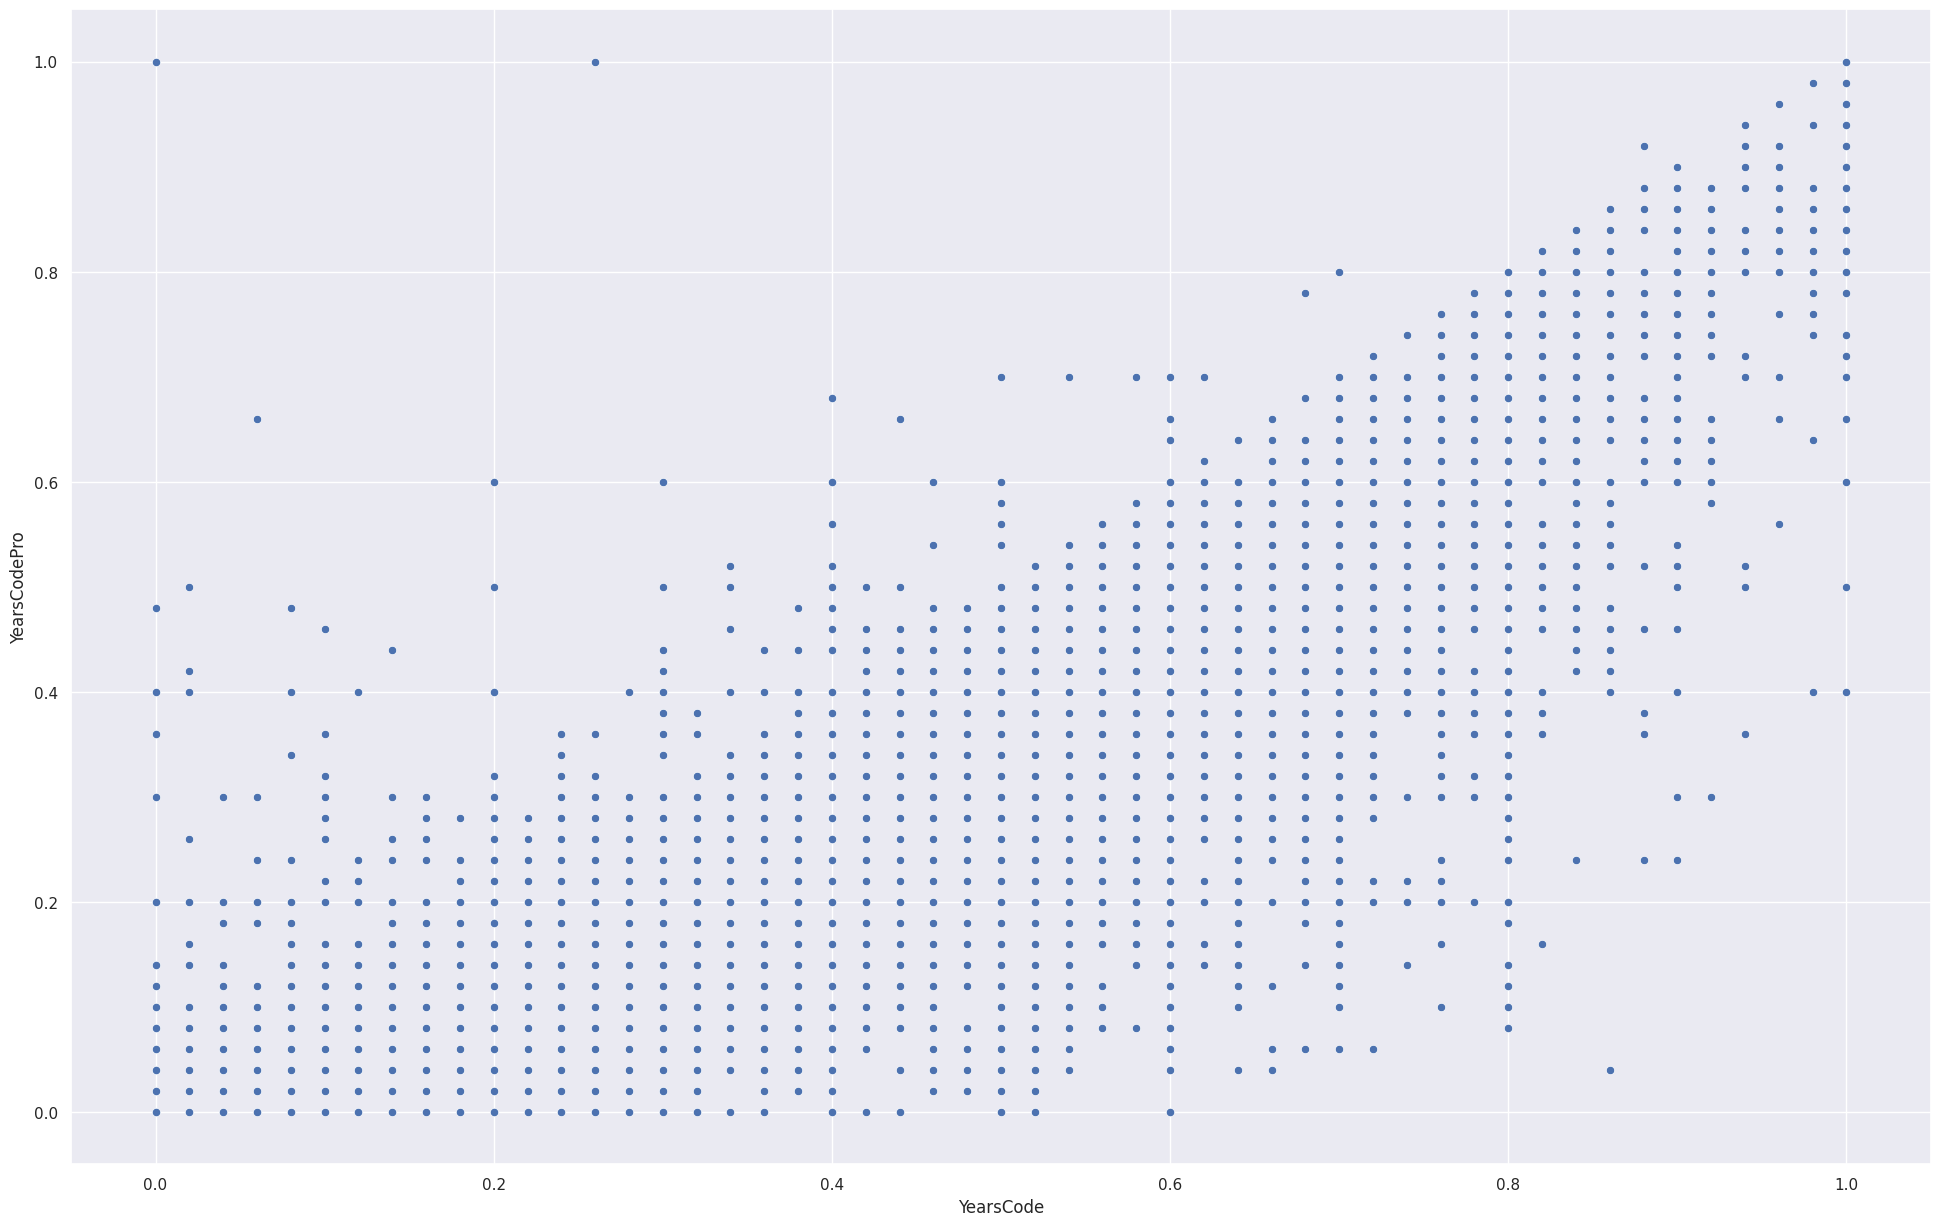

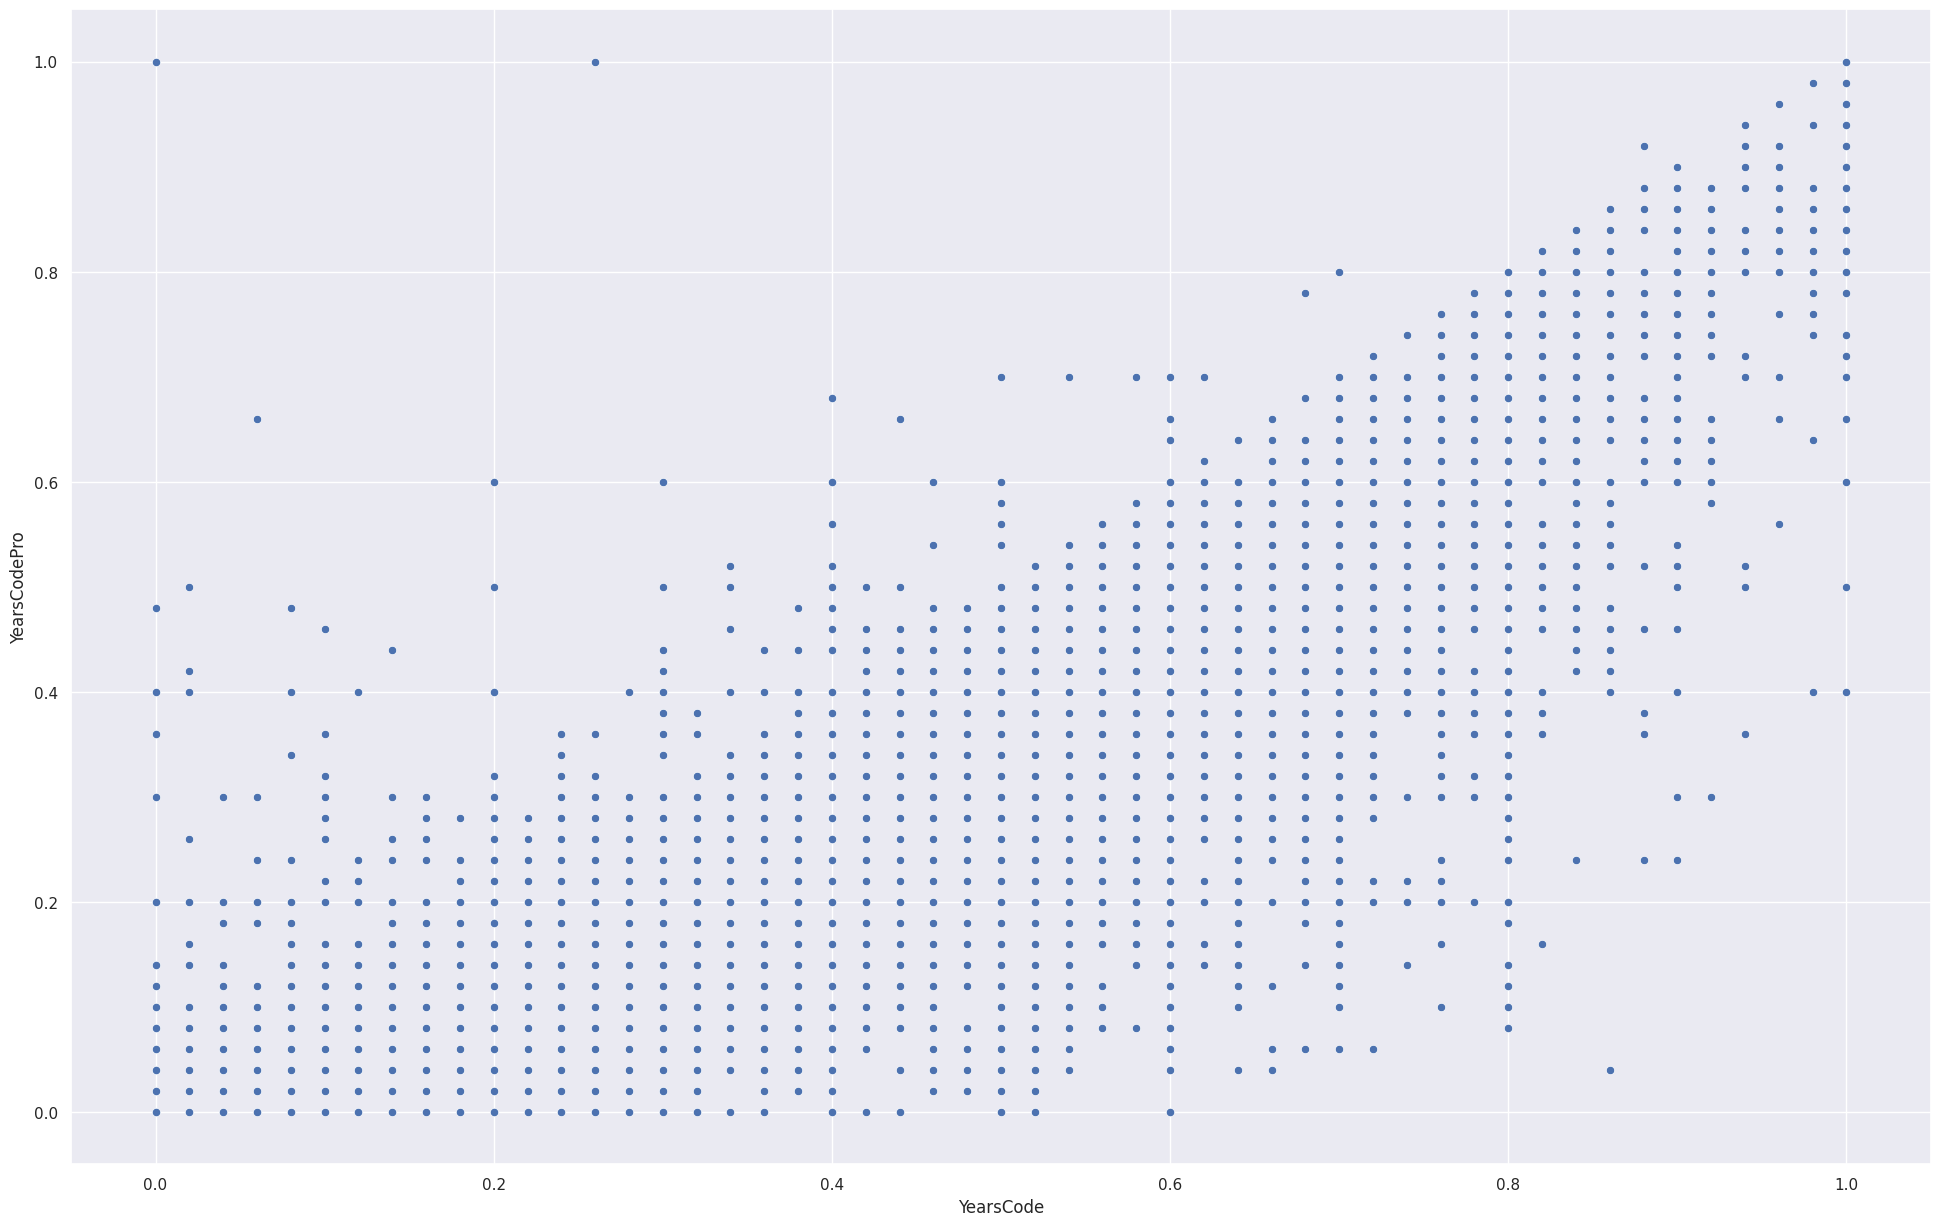

In [296]:
sns.set_theme()

plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized, x='PreviousSalary', y='YearsCodePro')
plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized, x='PreviousSalary', y='YearsCode')

plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized_old, x='YearsCode', y='YearsCodePro')
plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized, x='YearsCode', y='YearsCodePro')

in report describe why have you cut data above line above

# **Classification Task**

Imports

In [297]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

Define classifiers

In [298]:
#clf = svm.SVC(kernel='rbf')
#clf = MLPClassifier()
#clf = KNeighborsClassifier(n_neighbors=5)
#clf = tree.DecisionTreeClassifier(max_depth=3)

**SVM clasiffiers**

SVM classifier kernel linear

In [299]:
#y_pred_train = clf.predict(dataTrain_normalized['YearsCodePro'].to_numpy().reshape(-1,1))

In [300]:
clf = svm.SVC(kernel='rbf')
clf.fit(dataTrain_normalized['Gender_Woman'].to_numpy().reshape(-1,1), y)
y_pred_train = clf.predict(dataTrain_normalized['Gender_Woman'].to_numpy().reshape(-1,1))
y_pred = clf.predict(X_val['Gender_Woman'].to_numpy().reshape(-1,1))

acc_train_svc_rbf = accuracy_score(y, y_pred_train)
acc_val_svc_rbf = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_svc_rbf}, val: {acc_val_svc_rbf}")

acc score, train: 0.7758577624378392, val: 0.772683923705722


SVM classifier kernel poly

In [301]:
clf = svm.SVC(kernel='poly', degree=2)
clf.fit(dataTrain_normalized, y)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_svc_rbf = accuracy_score(y, y_pred_train)
acc_val_svc_rbf = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_svc_rbf}, val: {acc_val_svc_rbf}")

acc score, train: 0.7775835055291901, val: 0.772683923705722


**MLP Classifier**

In [302]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(15), solver='lbfgs', max_iter=3000, early_stopping=True)
clf.fit(dataTrain_normalized, y)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_mlp = accuracy_score(y, y_pred_train)
acc_val_mlp = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_mlp}, val: {acc_val_mlp}")

acc score, train: 0.7805354345012375, val: 0.7726158038147138


In [303]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(15, 10), solver='adam', max_iter=100000, random_state=1, early_stopping=True)
clf.fit(dataTrain_normalized, y)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_mlp = accuracy_score(y, y_pred_train)
acc_val_mlp = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_mlp}, val: {acc_val_mlp}")

acc score, train: 0.778764277118009, val: 0.2273841961852861


In [304]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(1), solver='sgd', max_iter=100000, random_state=1, early_stopping=True)
clf.fit(dataTrain_normalized, y)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_mlp = accuracy_score(y, y_pred_train)
acc_val_mlp = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_mlp}, val: {acc_val_mlp}")

acc score, train: 0.7758577624378392, val: 0.772683923705722


10,35,25

In [305]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(1), solver='lbfgs', random_state=0)
x_frames = [dataTrain_normalized, X_val]
x_11 = pd.concat(x_frames)
y_frames = [y, y_val]
y_11 = pd.concat(y_frames)
clf.fit(x_11, y_11)

y_pred_test = clf.predict(X_test)

acc_test_mlp = accuracy_score(y_test, y_pred_test)

print(f"acc score, test: {acc_train_mlp}")

acc score, test: 0.7758577624378392


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


**KNN Classifier**

In [306]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)

clf.fit(dataTrain_normalized, y)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_knn = accuracy_score(y, y_pred_train)
acc_val_knn = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_knn}, val: {acc_val_knn}")

acc score, train: 0.9867617339176639, val: 0.7722070844686648


In [307]:
clf = KNeighborsClassifier(n_neighbors=15)

clf.fit(dataTrain_normalized, y)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_knn = accuracy_score(y, y_pred_train)
acc_val_knn = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_knn}, val: {acc_val_knn}")

acc score, train: 0.7843275278730216, val: 0.772683923705722


**Random tree**

In [308]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=8)

clf.fit(dataTrain_normalized, y)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_tree = accuracy_score(y, y_pred_train)
acc_val_tree = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_tree}, val: {acc_val_tree}")

acc score, train: 0.7846681350621041, val: 0.7683242506811989


**Pipeline**

In [309]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=2)),
 ('linear', LinearRegression(fit_intercept=False))])

model = model.fit(dataTrain_normalized, y)

y_pred_train = model.predict(dataTrain_normalized)
y_pred = model.predict(X_val)

acc_train_mlp = accuracy_score(y, y_pred_train)
acc_val_mlp = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_mlp}, val: {acc_val_mlp}")

ValueError: ignored